In [161]:
from tensorflow.keras.models import load_model
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [151]:
model = load_model('lstm_stock_model.h5')

In [191]:
ticker = 'ASIANPAINT.NS'
stock = yf.Ticker(ticker)
price = stock.history(period='5y')
price.ffill(inplace=True)

In [192]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [193]:
price_scaled = scaler.fit_transform(price[['Open', 'High', 'Low', 'Close', 'Volume']])

def create_sequences(data, time_steps=60):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
    return np.array(X)

time_steps = 60
X = create_sequences(price_scaled, time_steps)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

In [194]:
predicted_stock_price = model.predict(X[-1].reshape(1, time_steps, 5))  # Last sequence
predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_stock_price[0][0], 0]])[:, 3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [195]:
print(f"Predicted stock price for {ticker} for the next day: ${predicted_price[0]:.2f}")

Predicted stock price for ASIANPAINT.NS for the next day: $2505.50


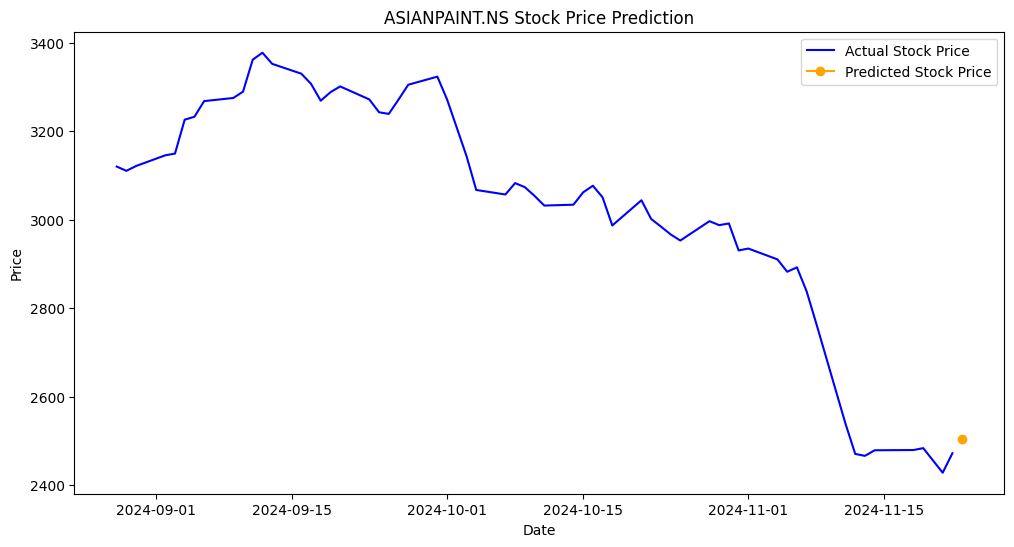

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(price.index[-60:], price['Close'].tail(60), label="Actual Stock Price", color='blue')
plt.plot(price.index[-1] + pd.Timedelta(days=1), predicted_price[0], label="Predicted Stock Price", color='orange', marker='o')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
